<a href="https://colab.research.google.com/github/fatimazain118/ML/blob/main/BinaryClassification_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import metrics


import logging,sys


In [283]:
from google.colab import drive  #mounting google drive to take excel sheet input
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [284]:
df = pd.read_csv('/content/gdrive/MyDrive/binary.csv.zip')
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [285]:
df.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [287]:
df.ndim

2

In [288]:
df.head(5)      #admit is output variable

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [289]:
df.gre.mean()

587.7

In [290]:
df["rank"].mode()       #like this we'll find for rank 

0    2
dtype: int64

In [291]:
df.gpa.median()

3.395

In [292]:
df.gpa.mean()

3.3899000000000017

In [293]:
df["rank"].unique()   #discreet column--rank,admit

array([3, 1, 4, 2])

In [294]:
df['gre'].unique()  #continuous column

array([380, 660, 800, 640, 520, 760, 560, 400, 540, 700, 440, 480, 780,
       360, 500, 600, 680, 620, 580, 460, 740, 300, 720, 340, 420, 220])

In [295]:
df.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [296]:
df["rank"].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: rank, dtype: float64

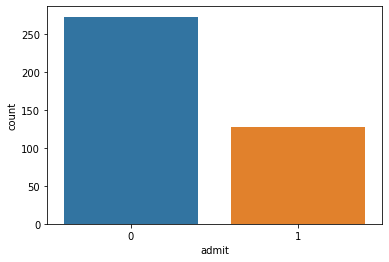

In [297]:
import seaborn as sns
sns.countplot(x="admit",data=df)

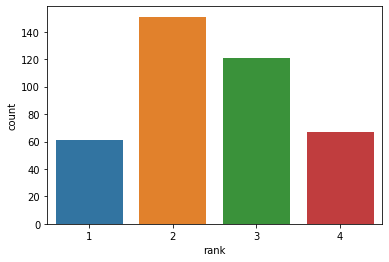

In [298]:
sns.countplot(x="rank",data=df)     #for discreet data we can do countplot or histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


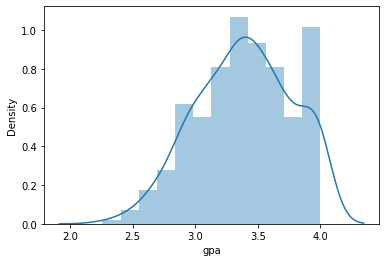

In [299]:
sns.distplot(df["gpa"])  #distribution plot for comtinuous variable

In [300]:
df["rank"].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [301]:
df["rank"].unique()

array([3, 1, 4, 2])

In [302]:
pd.crosstab(df["rank"],df["admit"])

admit,0,1
rank,,
1,28,33
2,97,54
3,93,28
4,55,12


In [303]:

#Splitting independent data and targeted data as test and train
from sklearn.model_selection import train_test_split

from sklearn import metrics



In [304]:

#Splitting independent data and targeted data as test and train
X_train, X_test, Y_train, Y_test= train_test_split(df[["gpa","gre","rank"]],
                                                   df[["admit"]],test_size=0.1,
                                                   random_state=66)
#random_state is used to fixed the first state, if it's not present we'll get different o/p everytime when we run the model
#use to control random dataset generated for training an test-- it fixed training and test data, also any random no. can put in place of 66

In [305]:
X_train.shape #--80% to total rows, to find the size of X_train

(360, 3)

In [306]:
from sklearn.neighbors import KNeighborsClassifier
clf_entropy=KNeighborsClassifier(n_neighbors=16, p=1, weights='uniform') 

In [307]:
clf_entropy.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=1,
                     weights='uniform')

In [308]:
#predicting test data values for clf_entropy model
predicted_entropy = clf_entropy.predict(X_test)

In [309]:
#Confusion Matrix
from  sklearn.metrics import confusion_matrix 
cM = confusion_matrix(Y_test,predicted_entropy)
print(cM)
#generic matrix
tp, fp, fn, tn = cM.ravel()
recall = tp/(tp+fn)
precision=tp/(tp+fp)
print("Recall = Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Precision=",tp/(tp+fp))
f1score= 2 *(recall*precision)/(precision+recall)
print("f1 score=", f1score)

#accuracy and recall should be good


[[29  0]
 [10  1]]
Recall = Sensitivity =  0.7435897435897436
Specificity = 1.0
Accuracy= 0.75
Precision= 1.0
f1 score= 0.8529411764705882
